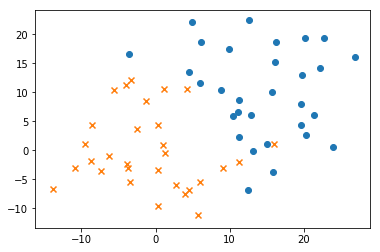

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import multivariate_normal

N1 = 30         # クラス t=+1 のデータ数
Mu1 = [15,10]   # クラス t=+1 の中心座標
N2 = 30         # クラス t=-1 のデータ数
Mu2 = [0,0]     # クラス t=-1 の中心座標


def prepare_dataset(variance):
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])

    df1 = DataFrame(multivariate_normal(Mu1,cov1,N1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(Mu2,cov2,N2),columns=['x','y'])
    df2['type'] = -1 
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

train_set = prepare_dataset(50)
train_set1 = train_set[train_set['type']==1]
train_set2 = train_set[train_set['type']==-1]
ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
# plt.set_ylim([ymin-1, ymax+1])
# plt.set_xlim([xmin-1, xmax+1])
plt.scatter(train_set1.x, train_set1.y, marker='o', label=None)
plt.scatter(train_set2.x, train_set2.y, marker='x', label=None)
plt.show()

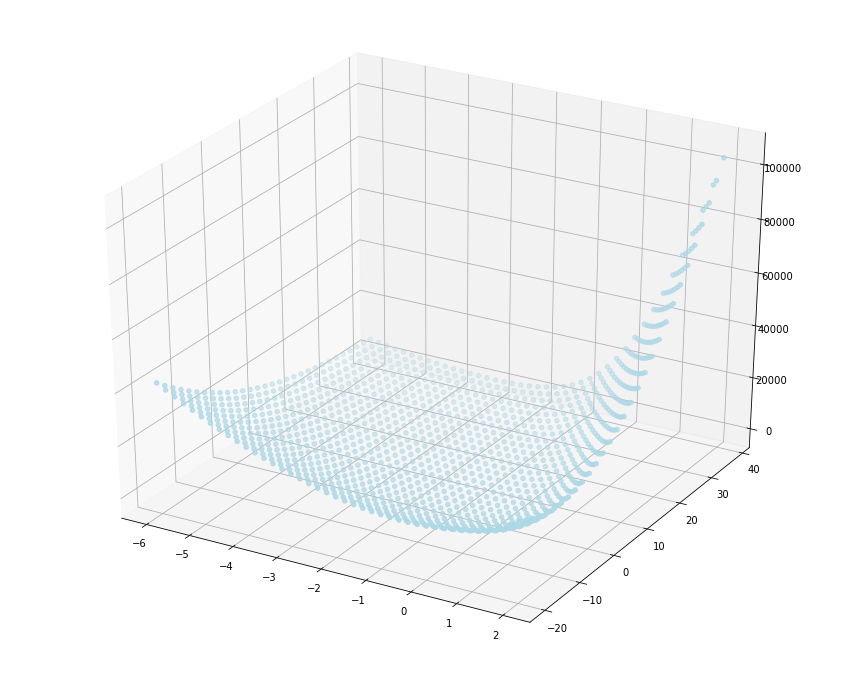

In [194]:
# initial guess
a = 1
b = 1

# learning rate
lr = 0.000005

def cost():
    global a, b
   
    r = 0
    for ix in xrange(len(train_set1)):
        d = (train_set1.y.values[ix] - (a * train_set1.x.values[ix] + b)) ** 2
        if train_set1.y.values[ix] > a * train_set1.x.values[ix] + b: d = 0
        r += d
    for ix in xrange(len(train_set2)):
        d = (train_set2.y.values[ix] - (a * train_set2.x.values[ix] + b)) ** 2
        if train_set2.y.values[ix] < a * train_set2.x.values[ix] + b: d = 0
        r += d
    return r

va = [];vb = [];vc = []
for aa in range(-30,11):
    a = 1.0 * aa / 5
    for bb in range(-10, 20):
        b = 1.0 * bb * 2
        c = cost()
        va.append(a);vb.append(b);vc.append(c)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(va, vb, vc, color='lightblue', depthshade=True)

plt.show()

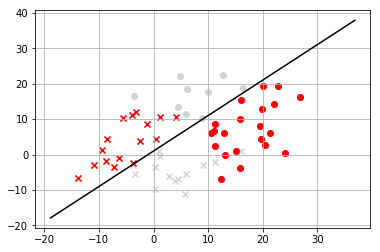

4710.52566313


In [195]:
a = 1
b = 1

def line(a, b):
    vx = [xmin, xmax]
    vy = [a * xmin + b, a * xmax + b]
    plt.plot(vx, vy, color='black')
    
    
def plot():
    plt.scatter(train_set1.x, train_set1.y, marker='o', color='lightgray')
    plt.scatter(train_set2.x, train_set2.y, marker='x', color='lightgray')
    vx4 = []
    vy4 = []
    vx5 = []
    vy5 = []
    for ix in xrange(len(train_set1)):
        fx = train_set1.x.values[ix] * a + b
        if train_set1.y.values[ix] < fx:
            vx4.append(train_set1.x.values[ix])
            vy4.append(train_set1.y.values[ix])
    for ix in xrange(len(train_set2)):
        fx = train_set2.x.values[ix] * a + b
        if train_set2.y.values[ix] > fx:
            vx5.append(train_set2.x.values[ix])
            vy5.append(train_set2.y.values[ix])
    line(a, b)
    plt.scatter(vx4, vy4, marker='o', color='red')
    plt.scatter(vx5, vy5, marker='x', color='red')
    plt.grid()
    plt.show()

plot()
print cost()

-1.03412451972 12.7886121348 72.71649299


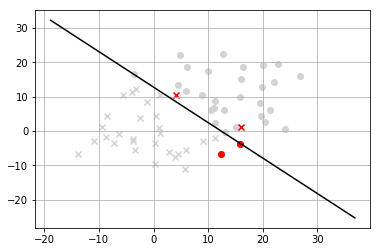

In [196]:
a = 1
b = 1
def gradient():
    r = [0, 0]
    vx = train_set1.x.values
    vy = train_set1.y.values
    for ix in xrange(len(vx)):
        r[0] += -2 * vx[ix] * (vy[ix] - (a * vx[ix] + b)) if vy[ix] <= a * vx[ix] + b else 0
        r[1] += -2 * (vy[ix] - (a * vx[ix] + b)) if vy[ix] <= a * vx[ix] + b else 0
    vx = train_set2.x.values
    vy = train_set2.y.values
    for ix in xrange(len(vx)):
        r[0] += -2 * vx[ix] * (vy[ix] - (a * vx[ix] + b)) if vy[ix] >= a * vx[ix] + b else 0
        r[1] += -2 * (vy[ix] - (a * vx[ix] + b)) if vy[ix] >= a * vx[ix] + b else 0
    return r

# learning rate
lr = 0.0005
       
iteration = 30000

for ix in xrange(iteration):
    g = gradient()
    a = a + -lr * g[0]
    b = b + -lr * g[1]

print a, b, cost()
plot()

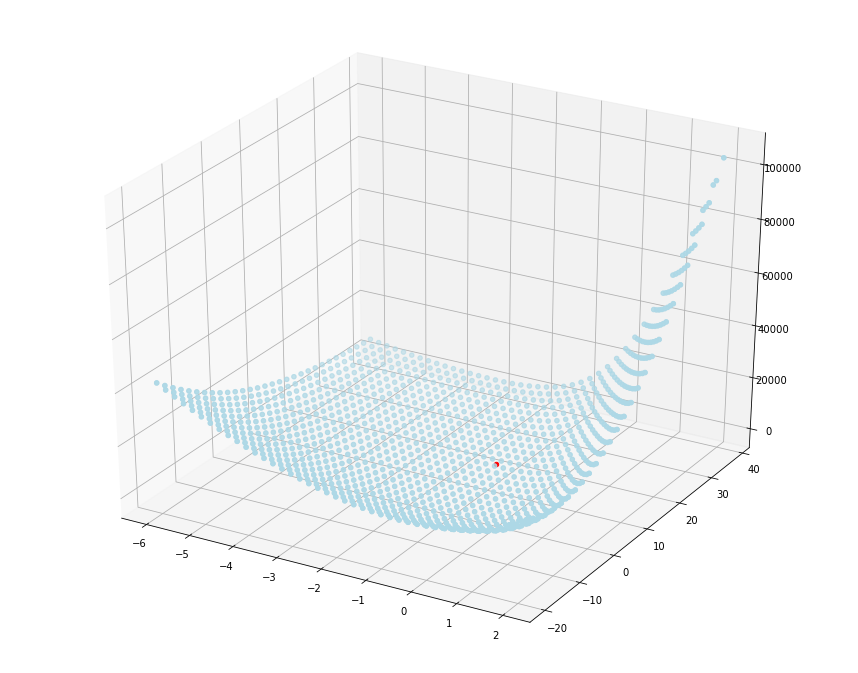

In [197]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(va, vb, vc, color='lightblue', depthshade=True)
ax.scatter(va, vb, vc, color='lightblue', depthshade=True)
ax.scatter([a], [b], [cost()], c='red', depthshade=False)

plt.show()